# Injury and Death Prediction Model


## 1. Import Libraries

In [150]:

import pandas as pd
import numpy as np

In [151]:
# Libraries for visual representation/ plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns


# Here we set styles for matplotlib and seaborn
plt.style.use('ggplot')
sns.set_palette('Set2')

In [229]:
# All the scikit learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importing all the sciket learn models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics realated imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Here we import plotly for visualizing the optuna data
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

In [153]:
# Importing optuna for tuning all the hyperparameters to improve our models F1 ScoreS
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 2. Data Loading and Initial Processing

### 2.1 Importing all the data into a dataframe

In [154]:
print("Loading data...")
df = pd.read_csv('final_data.csv')

Loading data...


Now, we select only electric vehicles

In [155]:
# using the filter on the column that we created in phase-1
df = df[df['is_e_vehicle'] == True]

Processing the the data into 3 classes for classification algorithms

In [156]:
print("[*] Converting the target variables to 3 classes")
df['CAUSALITY'] = ((df['NUMBER OF PERSONS INJURED'] > 0) | (df['NUMBER OF PERSONS KILLED'] > 0)).astype(int)
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].apply(lambda x: 2 if x >= 2 else x).astype('category')
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].apply(lambda x: 2 if x >= 2 else x).astype('category')

[*] Converting the target variables to 3 classes


In [157]:
# Viewing the dataset entries at the start
print("[*] First few rows:")
df.head()

[*] First few rows:


,CRASH DATE & TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Addresses,Time of Day,NLat,NLong,Location,is_e_vehicle,CAUSALITY
61,2012-07-01 03:58:00,manhattan,10002,40.721986,-73.985515,"(40.7219864, -73.9855153)",0,0,0,0,...,NaN,NaN,NaN,east houston street norfolk street new york,night,NaN,NaN,NaN,True,0
1433,2012-07-03 18:40:00,brooklyn,11221,40.693022,-73.916256,"(40.6930216, -73.9162561)",0,0,0,0,...,NaN,NaN,NaN,woodbine street central avenue new york,evening,NaN,NaN,NaN,True,0
1760,2012-07-04 16:00:00,brooklyn,11222,40.725616,-73.944497,"(40.7256163, -73.944497)",0,0,0,0,...,NaN,NaN,NaN,russell street nassau avenue new york,afternoon,NaN,NaN,NaN,True,0
1858,2012-07-04 20:30:00,manhattan,10038,40.708272,-74.001901,"(40.7082718, -74.0019008)",0,0,0,0,...,NaN,NaN,NaN,peck slip water street new york,evening,NaN,NaN,NaN,True,0
2203,2012-07-05 13:49:00,queens,11418,40.702126,-73.834808,"(40.7021257, -73.8348083)",0,0,0,0,...,NaN,NaN,NaN,116 street 85 avenue new york,afternoon,NaN,NaN,NaN,True,0


In [158]:
# Viewing the information about the dataset to get a better understanding about the datatypes
print("[*] Dataset Info:")
df.info()


[*] Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 18531 entries, 61 to 1748146
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CRASH DATE & TIME              18531 non-null  object  
 1   BOROUGH                        18525 non-null  object  
 2   ZIP CODE                       18531 non-null  int64   
 3   LATITUDE                       18531 non-null  float64 
 4   LONGITUDE                      18531 non-null  float64 
 5   LOCATION                       18152 non-null  object  
 6   NUMBER OF PERSONS INJURED      18531 non-null  category
 7   NUMBER OF PERSONS KILLED       18531 non-null  category
 8   NUMBER OF PEDESTRIANS INJURED  18531 non-null  int64   
 9   NUMBER OF PEDESTRIANS KILLED   18531 non-null  int64   
 10  NUMBER OF CYCLIST INJURED      18531 non-null  int64   
 11  NUMBER OF CYCLIST KILLED       18531 non-null  int64   
 12  NUMBER OF MOTORI

Reading the date & time column and breaking it into parts

In [159]:
print("[*] Extracting datetime components")
df['CRASH DATE & TIME'] = pd.to_datetime(df['CRASH DATE & TIME'], errors='coerce')

[*] Extracting datetime components


In [160]:
# Extracting the year, month, day, hours, day of the week


df['Year'] = df['CRASH DATE & TIME'].dt.year
df['Month'] = df['CRASH DATE & TIME'].dt.month
df['Day'] = df['CRASH DATE & TIME'].dt.day
df['Hour'] = df['CRASH DATE & TIME'].dt.hour
df['DayOfWeek'] = df['CRASH DATE & TIME'].dt.dayofweek

In [161]:

# Printing all the date and time information that we extracted before
print("[*] Datetime features:")
df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].describe()


[*] Datetime features:


,Year,Month,Day,Hour,DayOfWeek
count,18531.000000,18531.000000,18531.000000,18531.000000,18531.000000
mean,2021.695699,7.033134,15.662242,14.190869,2.930009
std,2.131523,3.101743,8.706385,5.875153,1.931870
min,2012.000000,1.000000,1.000000,0.000000,0.000000
25%,2021.000000,5.000000,8.000000,11.000000,1.000000
50%,2022.000000,7.000000,16.000000,15.000000,3.000000
75%,2023.000000,10.000000,23.000000,19.000000,5.000000
max,2025.000000,12.000000,31.000000,23.000000,6.000000


## 3. Feature Engineering

In [162]:
features = ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'VEHICLE TYPE CODE 2', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']
# Herer we are listing all the features that we will use for further processing

In [163]:
# Here we define the target/goal we want to get to
target_injuries = 'NUMBER OF PERSONS INJURED'
target_deaths = 'NUMBER OF PERSONS KILLED'

In [164]:
df_clean = df.dropna(subset=features + [target_injuries, target_deaths])
# Dropping if there is any value that is missing, just if there is any.

In [165]:
# Printing to see what the shape of the data is
print("Original dataset shape:", df.shape)
print("Clean dataset shape:", df_clean.shape)

Original dataset shape: (18531, 36)
Clean dataset shape: (15226, 36)


Here we introduce some new columns which will help our data to learn more about the dataset like time-factor analysis and also reduce the complexity

In [166]:
df_clean['IsRushHour'] = ((df_clean['Hour'] >= 7) & (df_clean['Hour'] <= 9)) | ((df_clean['Hour'] >= 16) & (df_clean['Hour'] <= 19))
df_clean['IsRushHour'] = df_clean['IsRushHour'].astype(int)
df_clean['IsNightTime'] = ((df_clean['Hour'] >= 22) | (df_clean['Hour'] <= 5)).astype(int)
# there are related to time

/var/folders/9n/b1lb14dd11v9kphcqy_pd2_h0000gn/T/ipykernel_89230/1504099695.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9n/b1lb14dd11v9kphcqy_pd2_h0000gn/T/ipykernel_89230/1504099695.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9n/b1lb14dd11v9kphcqy_pd2_h0000gn/T/ipykernel_89230/1504099695.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [167]:
# Here we create new feature based on factors other than time
df_clean['IsWeekend'] = (df_clean['DayOfWeek'] >= 5).astype(int)

# Here we expand our dataframe to include new features that we just created
features.extend(['IsRushHour', 'IsWeekend', 'IsNightTime'])

# Printing all the stats related to our new features
print("[*] Time feature statistics:")
df_clean[['IsRushHour', 'IsWeekend', 'IsNightTime']].describe()

[*] Time feature statistics:


/var/folders/9n/b1lb14dd11v9kphcqy_pd2_h0000gn/T/ipykernel_89230/3566250318.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IsRushHour,IsWeekend,IsNightTime
count,15226.000000,15226.000000,15226.000000
mean,0.395836,0.247603,0.165112
std,0.489046,0.431634,0.371294
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


Here we create a pipeline for our models

In [168]:
print("[*] Creating preprocessing pipeline...")
# Here we will define the category columns
categorical_cols = ['VEHICLE TYPE CODE 1', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']
numeric_cols = [col for col in features if col not in categorical_cols]

[*] Creating preprocessing pipeline...


In [169]:
print("[*] Numerical columns:", numeric_cols)
print("[*] Categorical columns:", categorical_cols)

# Defining a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

[*] Numerical columns: ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'VEHICLE TYPE CODE 2', 'IsRushHour', 'IsWeekend', 'IsNightTime']
[*] Categorical columns: ['VEHICLE TYPE CODE 1', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']


## 4. Data Splitting and Preprocessing

Spliting the data into training and teasting data

In [170]:
print("[*] Splitting data")
# Here we prepare dependent and independent variable for training out models and testing them
X = df_clean[features]
y_injuries = df_clean[target_injuries]
y_deaths = df_clean[target_deaths]

[*] Splitting data


In [171]:
# Here we actually split the data [this also has injuries and death difference]
X_train, X_test, y_inj_train, y_inj_test, y_death_train, y_death_test = train_test_split(
    X, y_injuries, y_deaths, test_size=0.2, random_state=42)


In [172]:
print("[*] Training dataset shape:", X_train.shape)
print("[*] Testing dataset shape:", X_test.shape)

[*] Training dataset shape: (12180, 11)
[*] Testing dataset shape: (3046, 11)


Defining objective function for our models

### Objective functions are written by refering the official documents: 
Link1: https://github.com/optuna/optuna
Link2: https://optuna.org/#code_examples

In [173]:
# For KNN 
def objective_knn(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))

In [174]:
# For Randomforest classifier
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        ))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))



In [175]:
# For Gradient Boost

def objective_gb(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            random_state=42
        ))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))

In [176]:
# Specifying category columns and numerical columns
categorical_cols = ['VEHICLE TYPE CODE 2', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']
numeric_cols = ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsRushHour', 'IsWeekend', 'IsNightTime']

In [177]:
print("[*] Numerical columns:", numeric_cols)
print("[*] Categorical columns:", categorical_cols)

[*] Numerical columns: ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsRushHour', 'IsWeekend', 'IsNightTime']
[*] Categorical columns: ['VEHICLE TYPE CODE 2', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']


Define our Pre-processor

In [178]:

preprocessor = ColumnTransformer(transformers=[('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

In [179]:
# Now we have to update the objective functions that we defined earlier since we changed our processor

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))

def objective_rf(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        ))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))

def objective_gb(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            random_state=42
        ))
    ])
    
    return -np.mean(cross_val_score(model, X_train, y_inj_train, cv=5, scoring='f1_weighted'))



In [180]:
# Now lets apply the optimization to get the best hyperparameters

print("[*] Optimizing Knn hyperparameters")
study_knn = optuna.create_study(direction='minimize')
study_knn.optimize(objective_knn, n_trials=5)

print("[*] Optimizing Random forest hyperparameter")
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=5)

print("[*] Optimizing Gradient boosting hyperparameters.")
study_gb = optuna.create_study(direction='minimize')
study_gb.optimize(objective_gb, n_trials=5)

[I 2025-03-07 22:12:03,782] A new study created in memory with name: no-name-45903d4e-d461-4db3-953c-4a47c907e78a


[*] Optimizing Knn hyperparameters


[I 2025-03-07 22:12:06,487] Trial 0 finished with value: -0.6691397622934301 and parameters: {'n_neighbors': 10, 'weights': 'distance'}. Best is trial 0 with value: -0.6691397622934301.
[I 2025-03-07 22:12:09,432] Trial 1 finished with value: -0.668559437622327 and parameters: {'n_neighbors': 10, 'weights': 'uniform'}. Best is trial 0 with value: -0.6691397622934301.
[I 2025-03-07 22:12:12,164] Trial 2 finished with value: -0.6721460081284093 and parameters: {'n_neighbors': 12, 'weights': 'distance'}. Best is trial 2 with value: -0.6721460081284093.
[I 2025-03-07 22:12:14,895] Trial 3 finished with value: -0.6716083817480282 and parameters: {'n_neighbors': 17, 'weights': 'distance'}. Best is trial 2 with value: -0.6721460081284093.
[I 2025-03-07 22:12:17,544] Trial 4 finished with value: -0.668559437622327 and parameters: {'n_neighbors': 10, 'weights': 'uniform'}. Best is trial 2 with value: -0.6721460081284093.
[I 2025-03-07 22:12:17,544] A new study created in memory with name: no-na

[*] Optimizing Random forest hyperparameter


[I 2025-03-07 22:12:22,003] Trial 0 finished with value: -0.6736945391148457 and parameters: {'n_estimators': 219, 'max_depth': 18, 'min_samples_split': 11}. Best is trial 0 with value: -0.6736945391148457.
[I 2025-03-07 22:12:25,213] Trial 1 finished with value: -0.6736659281994481 and parameters: {'n_estimators': 216, 'max_depth': 12, 'min_samples_split': 12}. Best is trial 0 with value: -0.6736945391148457.
[I 2025-03-07 22:12:27,344] Trial 2 finished with value: -0.6736934694088079 and parameters: {'n_estimators': 124, 'max_depth': 15, 'min_samples_split': 14}. Best is trial 0 with value: -0.6736945391148457.
[I 2025-03-07 22:12:30,579] Trial 3 finished with value: -0.6734941141307415 and parameters: {'n_estimators': 225, 'max_depth': 11, 'min_samples_split': 2}. Best is trial 0 with value: -0.6736945391148457.
[I 2025-03-07 22:12:33,302] Trial 4 finished with value: -0.5928961221337916 and parameters: {'n_estimators': 285, 'max_depth': 6, 'min_samples_split': 19}. Best is trial 0 

[*] Optimizing Gradient boosting hyperparameters.


[I 2025-03-07 22:12:46,310] Trial 0 finished with value: -0.6678068708318687 and parameters: {'n_estimators': 74, 'max_depth': 6, 'learning_rate': 0.17293189053579427}. Best is trial 0 with value: -0.6678068708318687.
[I 2025-03-07 22:12:54,949] Trial 1 finished with value: -0.6718621981980339 and parameters: {'n_estimators': 102, 'max_depth': 3, 'learning_rate': 0.26700971610364677}. Best is trial 1 with value: -0.6718621981980339.
[I 2025-03-07 22:13:27,247] Trial 2 finished with value: -0.6724306258711794 and parameters: {'n_estimators': 291, 'max_depth': 4, 'learning_rate': 0.03084049361470879}. Best is trial 2 with value: -0.6724306258711794.
[I 2025-03-07 22:13:42,589] Trial 3 finished with value: -0.6725068218044995 and parameters: {'n_estimators': 107, 'max_depth': 5, 'learning_rate': 0.05282214777527661}. Best is trial 3 with value: -0.6725068218044995.
[I 2025-03-07 22:14:38,734] Trial 4 finished with value: -0.6606106192622585 and parameters: {'n_estimators': 197, 'max_depth

In [181]:
# Lets see what paramaters have come out of our optimization
print("[*] Best Knn parameters:", study_knn.best_params)
print("[*] Best KNN metric:", -study_knn.best_value)

print("[*] Best Random Forest parameters:", study_rf.best_params)
print("[*] Best Random Forest metric:", -study_rf.best_value)

print("[*] Best Gradient Boosting parameters:", study_gb.best_params)
print("[*] Best Gradient Boosting metric:", -study_gb.best_value)

[*] Best Knn parameters: {'n_neighbors': 12, 'weights': 'distance'}
[*] Best KNN metric: 0.6721460081284093
[*] Best Random Forest parameters: {'n_estimators': 219, 'max_depth': 18, 'min_samples_split': 11}
[*] Best Random Forest metric: 0.6736945391148457
[*] Best Gradient Boosting parameters: {'n_estimators': 107, 'max_depth': 5, 'learning_rate': 0.05282214777527661}
[*] Best Gradient Boosting metric: 0.6725068218044995


## 5. Model Definitions

Here we define which models to use and the parameters for those models

In [219]:
# Define regression models
models = {
    'Linear Regression': Pipeline([
        ('regressor', LinearRegression())
    ]),
    'Polynomial Regression (degree=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regressor', LinearRegression())
    ]),
    'Polynomial Regression (degree=3)': Pipeline([
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('regressor', LinearRegression())
    ])
}

Now, here we define the classification models and their parameters

In [183]:
# Classification models - defining (with optuna)
classifier_models = {
    'KNN_Injury': Pipeline([ ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(**study_knn.best_params))]),
    'KNN_Death': Pipeline([ ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(**study_knn.best_params))]),
    'RF_Injury': Pipeline([ ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(**study_rf.best_params, random_state=42))]),
    'RF_Death': Pipeline([ ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(**study_rf.best_params, random_state=42))]),
    'GB_Injury': Pipeline([ ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(**study_gb.best_params, random_state=42))]),
    'GB_Death': Pipeline([ ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(**study_gb.best_params, random_state=42))])}

## 6. Model Training Functions

Here we define the train function for the regression models first then, it return a list of results for each model that we process in the pipeline

In [220]:
def train_regression_models(models, X_train, y_train, X_test, y_test, target_name):
    # list of results for every model that we process inside the pipeline
    results = []
    for model_name, model in models.items():
        pipeline = Pipeline([('preprocessor', preprocessor),('regressor', model)])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        results.append({'model': model_name, 'target': target_name, 'mse': mse, 'mae': mae, 'rmse': rmse})
    return results

Here we define the train function for the classification models

In [254]:
def train_classification_models(models, X_train, y_train, X_test, y_test, target_name):

    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train[model_name])
        y_pred = model.predict(X_test)
        
        results.append({
            'model': model_name,
            'target': target_name,
            'accuracy': accuracy_score(y_test[model_name], y_pred),
            'precision': precision_score(y_test[model_name], y_pred, average='weighted'),
            'recall': recall_score(y_test[model_name], y_pred, average='weighted'),
            'f1': f1_score(y_test[model_name], y_pred, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test[model_name], y_pred),
            'classification_report': classification_report(y_test[model_name], y_pred),
            'r2': r2_score(y_test[model_name], y_pred)
        })
    return results

## 7. Model Training and Evaluation

In [245]:
print("[*] Training and evaluating the regression models.")
injury_results = train_regression_models(models, X_train, y_inj_train, X_test, y_inj_test, "Injury")
death_results = train_regression_models(models, X_train, y_death_train, X_test, y_death_test, "Death")

[*] Training and evaluating the regression models.


In [253]:
# Printing regression results


print("\nRegression Models Results:")
for result in injury_results + death_results:
    print(f"\n{result['model']} - {result['target']} Prediction")
    print(f"Mean Squared Error: {result['mse']:.4f}")
    # print(f"Mean Absolute Error: {result['mae']:.4f}")
    # print(f"Root Mean Squared Error: {result['rmse']:.4f}")
    print(f"R-squared: {result['r2']:.4f}")


Regression Models Results:

Linear Regression - Injury Prediction
Mean Squared Error: 0.2681
R-squared: -0.0200

Polynomial Regression (degree=2) - Injury Prediction
Mean Squared Error: 0.2791
R-squared: -0.0619

Polynomial Regression (degree=3) - Injury Prediction
Mean Squared Error: 0.2792
R-squared: -0.0623

Linear Regression - Death Prediction
Mean Squared Error: 0.0056
R-squared: -0.0147

Polynomial Regression (degree=2) - Death Prediction
Mean Squared Error: 0.0059
R-squared: -0.0673

Polynomial Regression (degree=3) - Death Prediction
Mean Squared Error: 0.0059
R-squared: -0.0677


# Highly Skewed Dataset

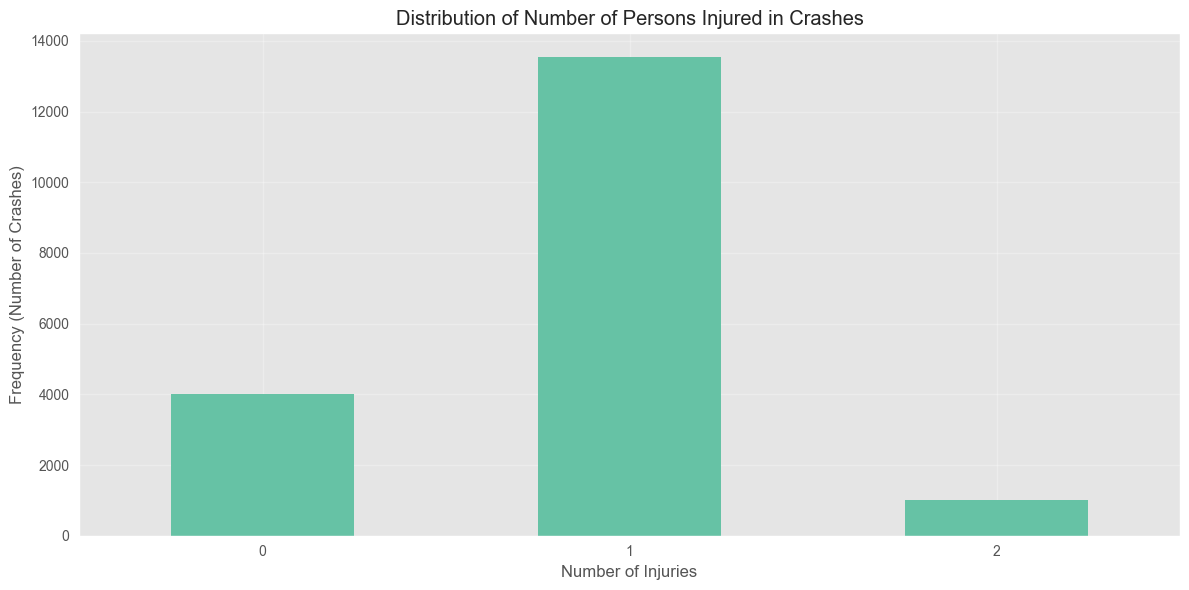

In [251]:
plt.figure(figsize=(12, 6))
df['NUMBER OF PERSONS INJURED'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Persons Injured in Crashes')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency (Number of Crashes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

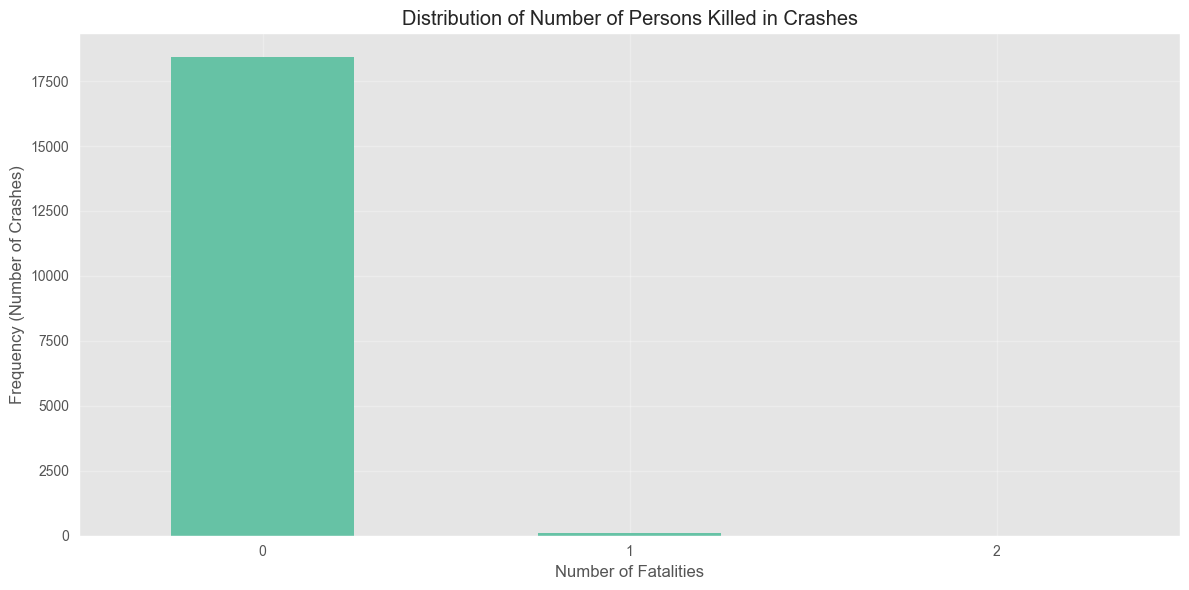

In [252]:
plt.figure(figsize=(12, 6))
df['NUMBER OF PERSONS KILLED'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Persons Killed in Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency (Number of Crashes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [188]:
# Here we train the classification models that we defined earlier
print("[*] Training the classification models>")

classification_results = train_classification_models(classifier_models, X_train,
    {'KNN_Injury': y_inj_train, 'KNN_Death': y_death_train,
     'RF_Injury': y_inj_train, 'RF_Death': y_death_train,
     'GB_Injury': y_inj_train, 'GB_Death': y_death_train},
    X_test,
    {'KNN_Injury': y_inj_test, 'KNN_Death': y_death_test,
     'RF_Injury': y_inj_test, 'RF_Death': y_death_test,
     'GB_Injury': y_inj_test, 'GB_Death': y_death_test}, "Classification"
)

[*] Training the classification models>


/Users/huiyu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/huiyu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/huiyu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/huiyu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [189]:
# Printing the output for classification algorithms
print("[*] Classification Models Results [Injuries]")

injury_result = classification_results[0]
print(f"[*] {injury_result['model']} Results:")
print(f"[*] Accuracy: {injury_result['accuracy']:.4f}")
print(f"[*] Precision: {injury_result['precision']:.4f}") 
print(f"[*] Recall: {injury_result['recall']:.4f}")
print(f"[*] F1 Score: {injury_result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(injury_result['classification_report'])
print()


[*] Classification Models Results [Injuries]
[*] KNN_Injury Results:
[*] Accuracy: 0.7301
[*] Precision: 0.6902
[*] Recall: 0.7301
[*] F1 Score: 0.6609
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.20      0.31       758
           1       0.73      0.97      0.84      2128
           2       0.00      0.00      0.00       160

    accuracy                           0.73      3046
   macro avg       0.48      0.39      0.38      3046
weighted avg       0.69      0.73      0.66      3046




In [190]:
# Print classification report for deaths
print("[*] Classification Models Results [Deaths]") 
death_result = classification_results[1]

print(f"[*] {death_result['model']} Results:")
print(f"[*] Accuracy: {death_result['accuracy']:.4f}")
print(f"[*] Precision: {death_result['precision']:.4f}")
print(f"[*] Recall: {death_result['recall']:.4f}") 
print(f"[*] F1 Score: {death_result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(death_result['classification_report'])
print()

[*] Classification Models Results [Deaths]
[*] KNN_Death Results:
[*] Accuracy: 0.9944
[*] Precision: 0.9889
[*] Recall: 0.9944
[*] F1 Score: 0.9916
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3029
           1       0.00      0.00      0.00        17

    accuracy                           0.99      3046
   macro avg       0.50      0.50      0.50      3046
weighted avg       0.99      0.99      0.99      3046




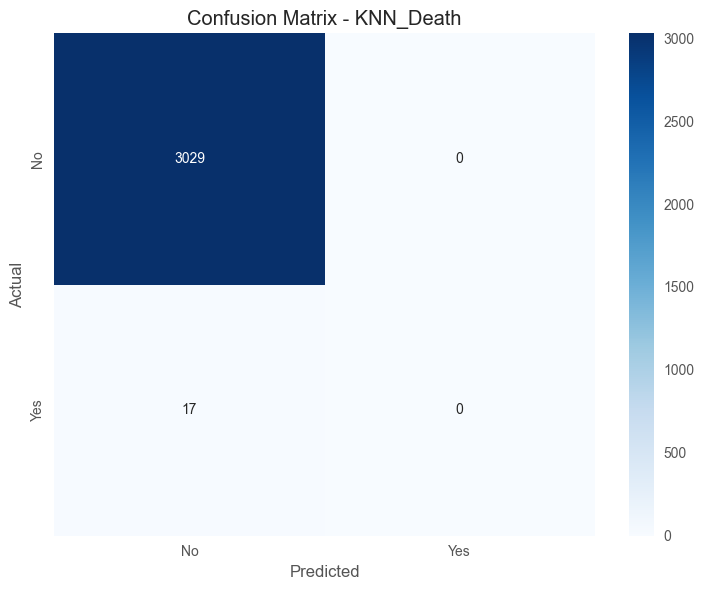

In [191]:
# Plotting a confusion matrix for the algorithm we just trainied


result = classification_results[1]
plt.figure(figsize=(7.5, 6))
sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.ylabel('Actual')
plt.title(f"Confusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


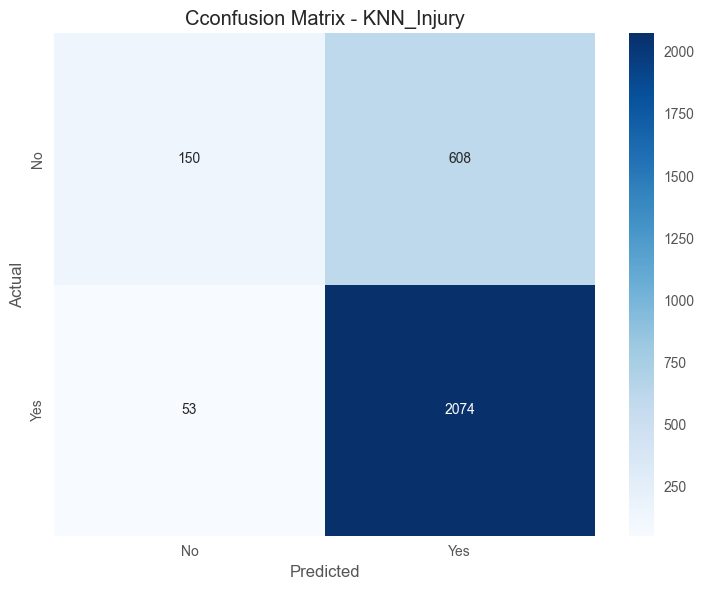

In [192]:
# This is confusion matrix for injuries
plt.figure(figsize=(7.5, 6))

result = classification_results[0]
sns.heatmap(result['confusion_matrix'][:2,:2], annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title(f"Cconfusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [193]:
# Printing the classification for Random forest Injuries
result = classification_results[2]  # Here we get the results for injuries (metrics)
print(f"[*] {result['model']} Results:")
print(f"[*] Accuracy: {result['accuracy']:.4f}")
print(f"[*] Precision: {result['precision']:.4f}")

print(f"[*] Recall: {result['recall']:.4f}")
print(f"[*] F1 Score: {result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(result['classification_report'])


[*] RF_Injury Results:
[*] Accuracy: 0.7403
[*] Precision: 0.7409
[*] Recall: 0.7403
[*] F1 Score: 0.6638
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.18      0.30       758
           1       0.73      1.00      0.84      2128
           2       0.00      0.00      0.00       160

    accuracy                           0.74      3046
   macro avg       0.55      0.39      0.38      3046
weighted avg       0.74      0.74      0.66      3046



In [194]:
# Printing the classification for Random forest deaths
result = classification_results[3]
print(f"[*] {result['model']} Results:")
print(f"[*] Accuracy: {result['accuracy']:.4f}")
print(f"[*] Precision: {result['precision']:.4f}")
print(f"[*] Recall: {result['recall']:.4f}")
print(f"[*] F1 Score: {result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(result['classification_report'])


[*] RF_Death Results:
[*] Accuracy: 0.9944
[*] Precision: 0.9889
[*] Recall: 0.9944
[*] F1 Score: 0.9916
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3029
           1       0.00      0.00      0.00        17

    accuracy                           0.99      3046
   macro avg       0.50      0.50      0.50      3046
weighted avg       0.99      0.99      0.99      3046



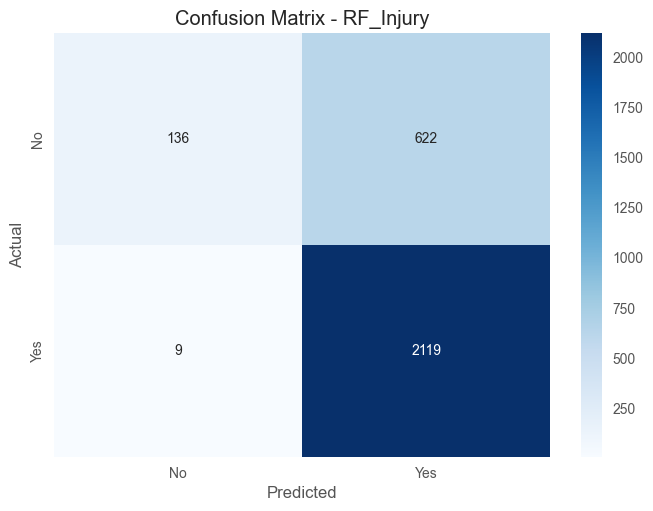

<Figure size 1000x600 with 0 Axes>

In [195]:
# Plotting the confusion matrix for random forest injuries

result = classification_results[2] 
sns.heatmap(result['confusion_matrix'][:2,:2], annot=True, fmt='d', 
            cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])


plt.title(f"Confusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

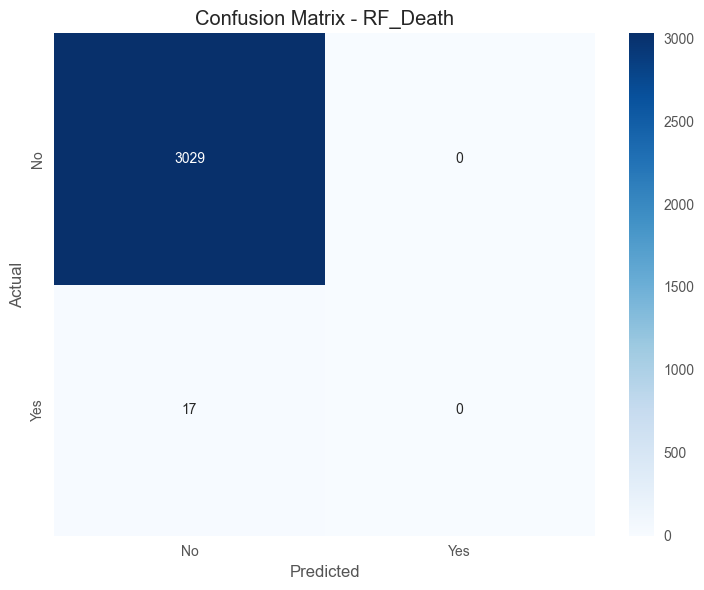

In [196]:
# Plotting the confusion matrix for random forest Death
plt.figure(figsize=(7.5, 6))

result = classification_results[3]
sns.heatmap(result['confusion_matrix'][:2,:2], annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.title(f"Confusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [197]:
# Plotting the confusion matrix for Gradient boosting for Deaths
result = classification_results[5]
print(f"[*] {result['model']} Results:")
print(f"[*] Accuracy: {result['accuracy']:.4f}")
print(f"[*] Precision: {result['precision']:.4f}")
print(f"[*] Recall: {result['recall']:.4f}")
print(f"[*] F1 Score: {result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(result['classification_report'])


[*] GB_Death Results:
[*] Accuracy: 0.9898
[*] Precision: 0.9895
[*] Recall: 0.9898
[*] F1 Score: 0.9897
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3029
           1       0.06      0.06      0.06        17

    accuracy                           0.99      3046
   macro avg       0.53      0.53      0.53      3046
weighted avg       0.99      0.99      0.99      3046



In [198]:
# Plotting the confusion matrix for Gradient boosting for Injuries
result = classification_results[4]
print(f"[*] {result['model']} Results:")
print(f"[*] Accuracy: {result['accuracy']:.4f}")
print(f"[*] Precision: {result['precision']:.4f}")
print(f"[*] Recall: {result['recall']:.4f}")
print(f"[*] F1 Score: {result['f1']:.4f}")
print("[*] Classification Report:")
print()
print(result['classification_report'])


[*] GB_Injury Results:
[*] Accuracy: 0.7360
[*] Precision: 0.7349
[*] Recall: 0.7360
[*] F1 Score: 0.6617
[*] Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.18      0.30       758
           1       0.73      0.99      0.84      2128
           2       0.09      0.01      0.01       160

    accuracy                           0.74      3046
   macro avg       0.57      0.39      0.38      3046
weighted avg       0.73      0.74      0.66      3046



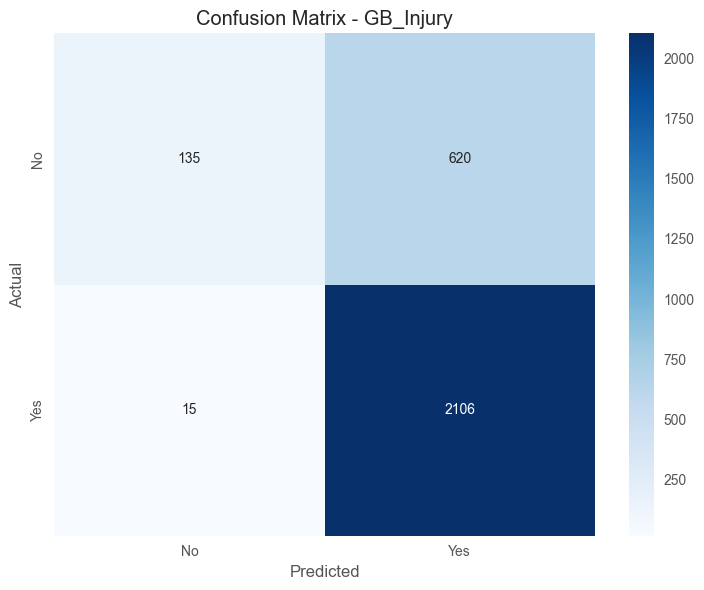

In [199]:
# Plotting confusion matrix for Gradient boosting - Injuries
plt.figure(figsize=(7.5, 6))

result = classification_results[4]  
sns.heatmap(result['confusion_matrix'][:2,:2], annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title(f"Confusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


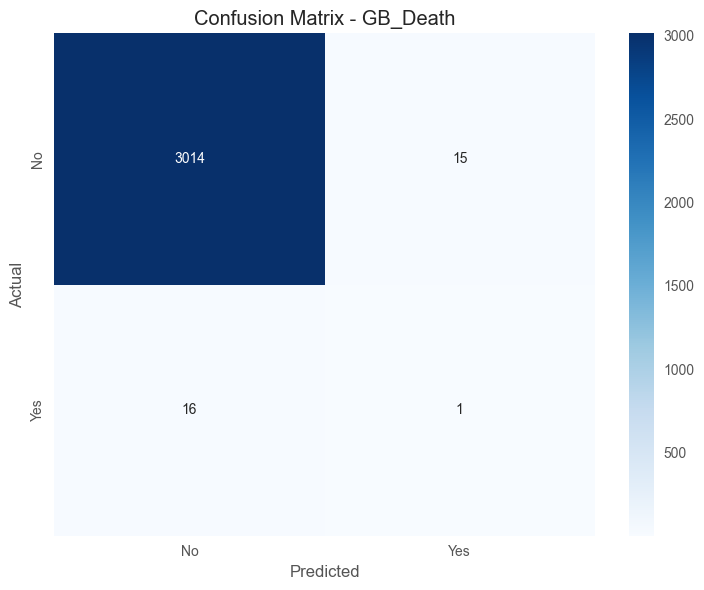

In [200]:
# Plotting confusion matrix for Gradient boosting - Deaths
plt.figure(figsize=(7.5, 6))

result = classification_results[5]
sns.heatmap(result['confusion_matrix'][:2,:2], annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.title(f"Confusion Matrix - {result['model']}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# Comparing F-1 scores for all the classification models

In [201]:
# Taking only the injury models for all the 3 models
injury_models = [result for result in classification_results if 'Injury' in result['model']]

In [202]:
# Here we get the names for the models
model_names = [result['model'] for result in injury_models]
f1_scores = [result['f1'] for result in injury_models]                  # Only utilizing the F-1 score metric from the result

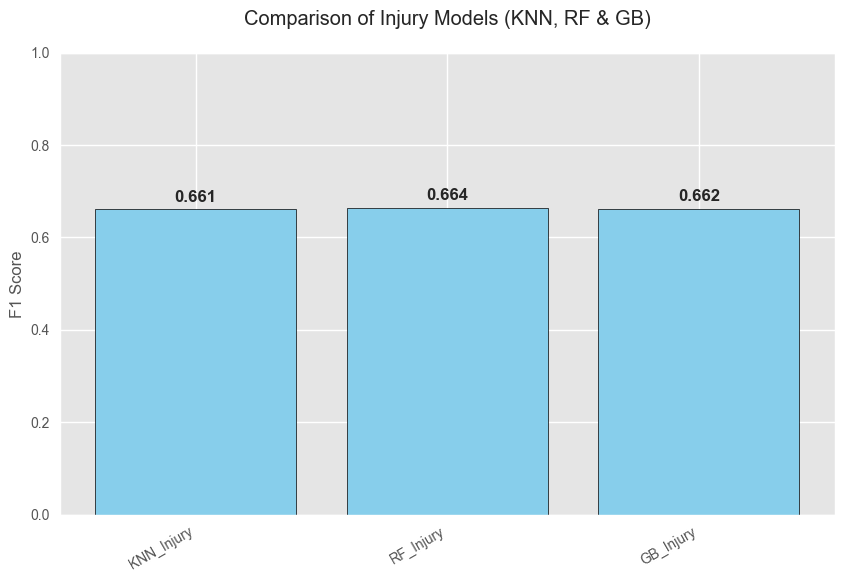

In [203]:
# Create the bar Graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='skyblue', edgecolor='black')
plt.ylabel('F1 Score')
plt.title('Comparison of Injury Models (KNN, RF & GB)', pad=20)
plt.xticks(rotation=30, ha='right')
# Prettifing the bar graph
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f'{f1:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(0, 1)
plt.show()

# Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression
# Prepare features and target
X = df_clean[features]
y = df_clean['CAUSALITY']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Create logistic regression pipeline
logistic_pipeline = Pipeline([('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = logistic_pipeline.predict(X_test)
y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

/Users/huiyu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Calculate metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Model Performance Metrics:
Accuracy: 0.7607
Precision: 0.7613
Recall: 0.9987
F1 Score: 0.8640

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.00      0.00       727
           1       0.76      1.00      0.86      2319

    accuracy                           0.76      3046
   macro avg       0.51      0.50      0.43      3046
weighted avg       0.64      0.76      0.66      3046


Confusion Matrix:
[[   1  726]
 [   3 2316]]


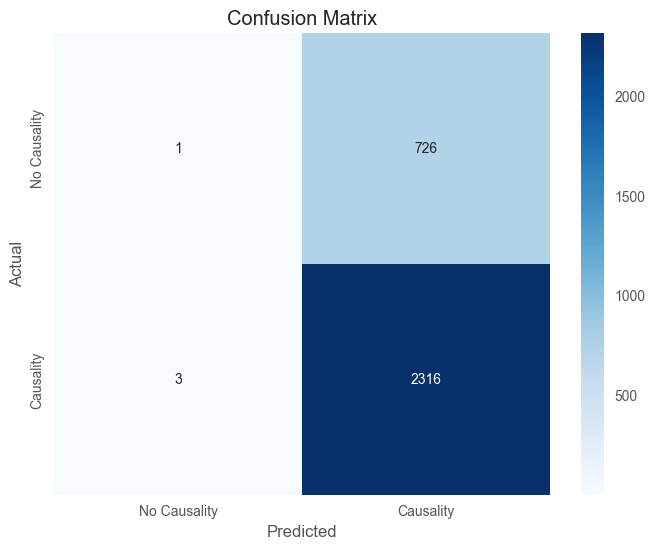

In [210]:
# Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Causality', 'Causality'],yticklabels=['No Causality', 'Causality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# END